<a href="https://colab.research.google.com/github/ykkimhgu/DLIP-src/blob/main/Tutorial_MNIST_MLP_Keras_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DLIP Tutorial MLP using Keras**
## XOR problem using Keras
Y.-K. Kim
(updated 2021. 5. 3) 

Also, refer to  https://keras.io/guides/sequential_model/

---
## Import Keras and Numpy

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
from tensorflow.keras import layers
print(keras.__version__)

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import numpy as np 

2.4.1
2.4.0


## Prepare Datasets: Input and Output

In [ ]:
from tensorflow.keras.datasets import mnist

# MNIST
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
#(x_train, y_train), (x_test, y_test)=mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test)=mnist.load_data()

x_test_org=x_test
y_test_org=y_test

### Open some of the image datasets

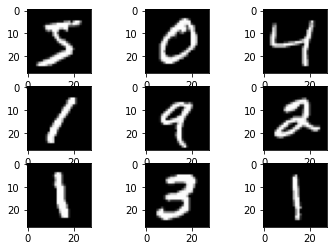

In [ ]:
from matplotlib import pyplot

# plot first 9 images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

### Normalization of dataset

In [ ]:
# Scale images to [0,1] range for normalization and 8-bit grayscale
#  **numpy.ndarray.astype** changes data type
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

# Check the dimension of data
print("check data dim")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# make sure images have shape (28, 28, 1)
# careful not to execute repeatevily. For it augments new axis

check data dim
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


### Flatten the input data
Reshape the data  to 1-D input data form for MLP.  

Look for  .reshape() method

In [ ]:
# Configuration options
feature_vector_length = 28*28
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], feature_vector_length)
x_test = x_test.reshape(x_test.shape[0], feature_vector_length)

# Check the dimension of data
print("Modified Input dim")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

Modified Input dim
x_train shape: (60000, 784)
x_test shape: (10000, 784)


 Convert class vectors to binary class matrices ' Categorical'

In [ ]:
print("y_train raw")
display(y_train.shape)
display(y_train[0])

y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test, num_classes)
print("\n y_train binary")
display(y_train.shape)
#display(y_train)
display(y_train[0])

y_train raw


(60000,)

5


 y_train binary


(60000, 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


## Build MLP model


In [ ]:
# Create the model
model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 35)                3535      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                360       
Total params: 82,395
Trainable params: 82,395
Non-trainable params: 0
_________________________________________________________________


### Activation function

For exercise, we have used  "sigmoid" for the activation function. 
You may change the function to "tanh", “relu”, "leaky-relu"  for hidden layer and “sigmoid” for output layer.

```
model.add(Activation('tanh'))
```

### Weight Initialization
 In Keras, dense layers by default uses “glorot_uniform” random initializer, it is also called Xavier normal initializer.

### Optimizer function
 Gradient descent is the common optimisation strategy used in neural networks. Many of the variants and advanced optimisation functions now are available, 
  
- Stochastic Gradient Descent[sgd]
- Adagrad
- Adamax
- RMSprop
- Adam   (Keras default optimizer)

For Adagrad, ADAM, etc,  the  learning rate changes during the training. 

Which learning rate should we use? small or large ? 

The learning rate is a hyper-parameter that also needs to be tuned. 
For a large one, it may help to jumpt out from the current local minimum. 
For a small one, it finds the local minimum more robustly. 


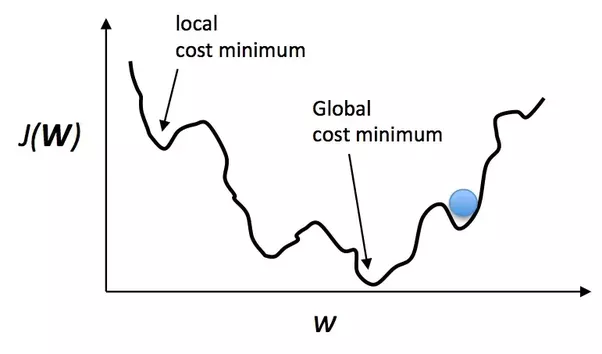



### Loss function

Example:
1. Linear regression->Mean Squared Error
2. Classification->Cross entropy

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model
Model.fit() method

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/10
192/192 [==============================] - 1s 5ms/step - loss: 0.9968 - accuracy: 0.7287 - val_loss: 0.2440 - val_accuracy: 0.9327
Epoch 2/10
192/192 [==============================] - 1s 4ms/step - loss: 0.2446 - accuracy: 0.9315 - val_loss: 0.1870 - val_accuracy: 0.9454
Epoch 3/10
192/192 [==============================] - 1s 4ms/step - loss: 0.1661 - accuracy: 0.9524 - val_loss: 0.1534 - val_accuracy: 0.9546
Epoch 4/10
192/192 [==============================] - 1s 4ms/step - loss: 0.1309 - accuracy: 0.9628 - val_loss: 0.1261 - val_accuracy: 0.9632
Epoch 5/10
192/192 [==============================] - 1s 4ms/step - loss: 0.1126 - accuracy: 0.9681 - val_loss: 0.1236 - val_accuracy: 0.9632
Epoch 6/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.1124 - val_accuracy: 0.9672
Epoch 7/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0783 - accuracy: 0.9781 - val_loss: 0.1070 - val_accuracy: 0.9675
Epoch 

## Evaluate the trained model

In [ ]:
score=model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9728
Test loss: 0.08826978504657745
Test accuracy:  0.9728000164031982


## Analyze the performance
Lets check which images were classificed correctly or not.

In [ ]:
# The predict_classes function outputs the highest probability class for each input example.

predicted_classes=np.argmax(model.predict(x_test), axis=-1)

print(predicted_classes)
print(predicted_classes.shape)
print(type(predicted_classes)) 

[7 2 1 ... 4 5 6]
(10000,)
<class 'numpy.ndarray'>
[7 2 1 ... 4 5 6]


In [ ]:
# used y_test_org
correct_indices = np.nonzero(predicted_classes == y_test_org)[0]  # 1-D  size
print(correct_indices)
print(len(correct_indices))

wrong_indices = np.nonzero(predicted_classes != y_test_org)[0]  # 1-D  size
print(len(wrong_indices))


print(len(correct_indices)/10000*100)

[   0    1    2 ... 9997 9998 9999]
9728
272
97.28


Check one random test image and predicted result

<class 'numpy.ndarray'>
x_test shape: (10000, 784)
6


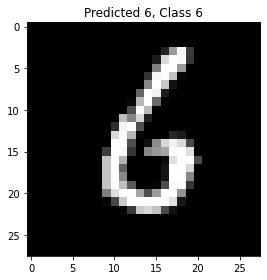

In [ ]:
# Check one test image e.g. test image #k  x_test[k]

print(type(x_test)) 
print("x_test shape:", x_test.shape)


# Plot the image at #k
k=50
print(predicted_classes[k])

pyplot.figure()    
pyplot.imshow(x_test[k].reshape(28,28), cmap='gray', interpolation='none')
pyplot.title("Predicted {}, Class {}".format(predicted_classes[k], y_test_org[k]))       
pyplot.tight_layout()



Lets plot some correct and incorrect examples

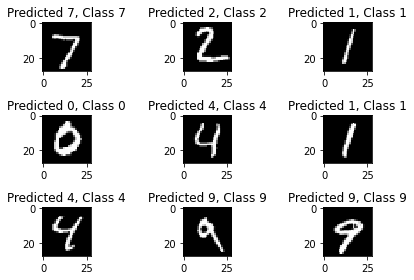

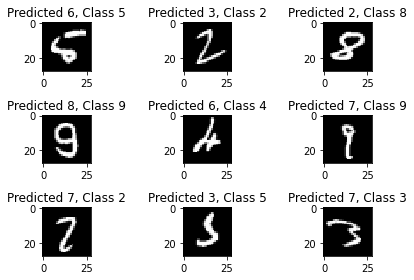

In [ ]:
pyplot.figure()
for i, correct in enumerate(correct_indices[:9]):
    pyplot.subplot(3,3,i+1)
    pyplot.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    pyplot.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test_org[correct]))
    
pyplot.tight_layout()  


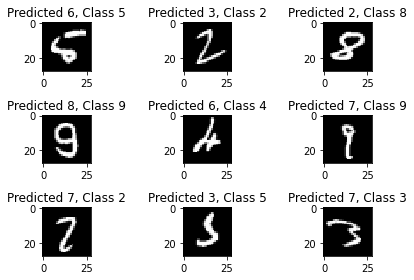

In [ ]:
pyplot.figure()
for i, wrong in enumerate(wrong_indices[:9]):
    pyplot.subplot(3,3,i+1)
    pyplot.imshow(x_test[wrong].reshape(28,28), cmap='gray', interpolation='none')
    pyplot.title("Predicted {}, Class {}".format(predicted_classes[wrong], y_test_org[wrong]))
    
pyplot.tight_layout()

### How to predict a single image using the trained MLP model?

Since you trained your model on mini-batches, your input is a tensor of shape [batch_size, image_width, image_height, number_of_channels]

(784,)
(1, 784)
6
6


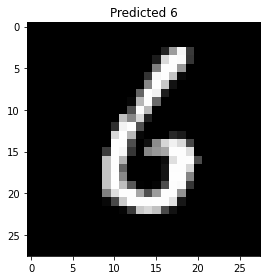

In [ ]:
# Since you trained your model on mini-batches, your input is a tensor of shape [batch_size, image_width, image_height, number_of_channels]

k=50
print(x_test[k].shape)
xtemp = np.expand_dims(x_test[k], axis=0)
print(xtemp.shape)

# Predict one image
predict_out=np.argmax(model(xtemp))
print(predict_out)

# OR you can use model.predict 
predict_out2=np.argmax(model.predict(xtemp))
print(predict_out2)

# Plot to check 
pyplot.figure()    
pyplot.imshow(x_test[k].reshape(28,28), cmap='gray', interpolation='none')
pyplot.title("Predicted {}".format(predict_out))       
pyplot.tight_layout()
    



---


# Exercise


## Exercise 1
Change the MLP model for better output
1. Number of layers and nodes
2. Activation functions
3, Optimization types
4. Batch size 

## Exercise 2
Predict a test image of your handwriting.
** You need to convert the image 28x28 in gray scale then to 1-D type. **